### SCIPY

1) We have min and max temperatures in a city in India for each months of the year. We would like to find a function to describe this and show it graphically, the dataset given below<br>
Task:<br>
1. fitting it to the periodic function<br>
2. plot the fit<br>

Data <br>
Max=39,41,43,47,49,51,45,38,37,29,27,25<br>
Min=21,23,27,28,32,35,31,28,21,19,17,18


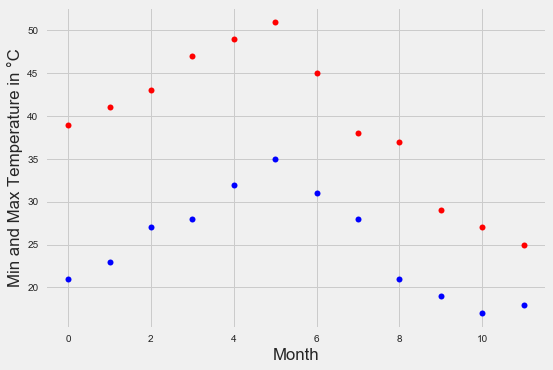

In [15]:
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
from scipy.optimize import curve_fit
Max=39,41,43,47,49,51,45,38,37,29,27,25
arr_max=np.array(Max)

Min=21,23,27,28,32,35,31,28,21,19,17,18
arr_min=np.array(Min)

months=np.arange(12)

plt.plot(months,Max,'.',color='r',marker='o',markersize=6)
plt.plot(months,Min,'.',color='b',marker='o',markersize=6)

plt.xlabel('Month')
plt.ylabel('Min and Max Temperature in °C')
plt.show()

In [13]:
from scipy import optimize
def yearly_temps(times, avg, ampl, time_offset):
    #print(time_offset)
    return (avg
            + ampl * np.cos((times + time_offset) * 2 * np.pi / times.max()))

res_max, cov_max = optimize.curve_fit(yearly_temps, months,
                                      arr_max, [20, 10, 0])
res_min, cov_min = optimize.curve_fit(yearly_temps, months,
                                      arr_min, [-40, 20, 0])

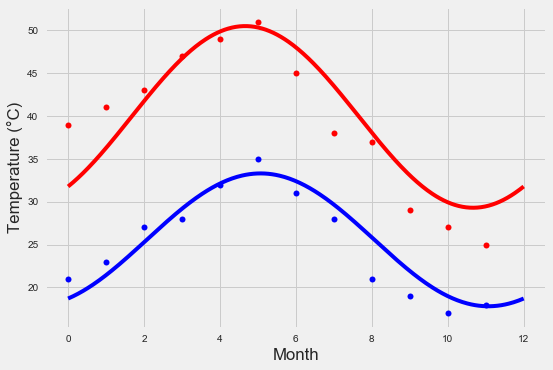

In [14]:
days = np.linspace(0, 12, num=365)

plt.figure()
plt.plot(months,Max,'.',color='r',marker='o',markersize=6)
plt.plot(days, yearly_temps(days, *res_max), 'r-')

plt.plot(months,Min,'.',color='b',marker='o',markersize=6)
plt.plot(days, yearly_temps(days, *res_min), 'b-')

plt.xlabel('Month')
plt.ylabel('Temperature (°C)')

plt.show()


Assignment is for visulization for matplotlib<br>
Data to use:<br>
    https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv<br>
    titanic=pd.read_csv(url)<br>
    Charts to plot:<br>
        1) Create a pie chart presenting the male/female proportions<br>
        2) Create a scatter plot with the fair paid and the age, differ the plot color by gender
        

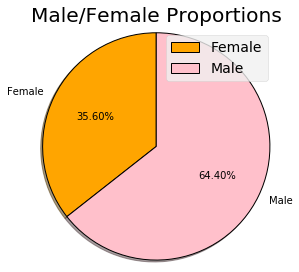

In [9]:
import pandas as pd
from matplotlib import pyplot as plt

titanic=pd.read_csv('https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv')

df=pd.DataFrame(titanic)
sex_group=df.groupby('sex')

female=df['sex'].value_counts()['female']
male=df['sex'].value_counts()['male']
sex=[female,male]
labels=['Female','Male']
plt.pie(sex,labels=labels,shadow=True,autopct='%1.2f%%',colors=['orange','pink'],startangle=90,radius=1.2,center=(0,0),wedgeprops={'edgecolor':'black'})

plt.style.use('fivethirtyeight')
plt.title('Male/Female Proportions')
plt.tight_layout()
plt.legend()
plt.show()


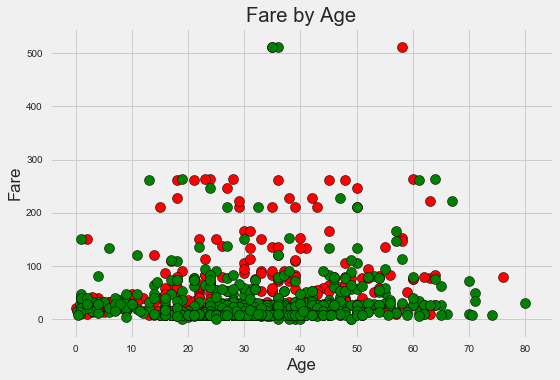

In [10]:


plt.style.use('seaborn')
plt.style.use('fivethirtyeight')

sex1=['female']
sex2=['male']

filt1=df['sex'].isin(sex1)
filt2=df['sex'].isin(sex2)
df1=df.loc[filt1,'fare']
df2=df.loc[filt2,'fare']

age1=df.loc[filt1,'age']
age2=df.loc[filt2,'age']

fare1=df1
fare2=df2

plt.scatter(age1,fare1,edgecolor='black',s=100,marker='o',color='red')
plt.scatter(age2,fare2,edgecolor='black',s=100,marker='o',color='green')

# c_bar=plt.colorbar()
# print(c_bar)


#plt.legend()

plt.xlabel('Age')
plt.ylabel('Fare')
plt.title('Fare by Age')
plt.tight_layout()
plt.show()

